In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris  = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names']+['target'])

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
for i in iris.columns:
    scal.fit(iris[[i]])
    iris[i] = scal.transform(iris[[i]])

In [6]:
from sklearn.cluster import KMeans

In [7]:
import matplotlib.pyplot as plt

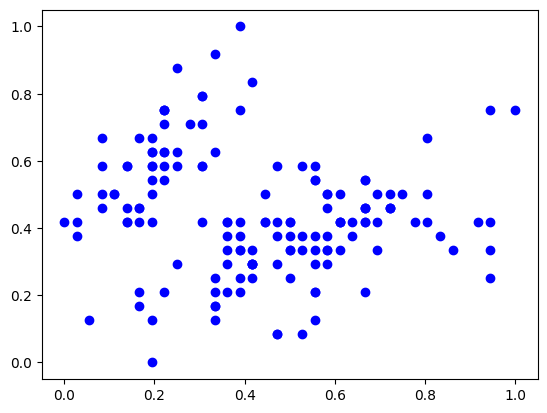

In [8]:
plt.scatter(iris['sepal length (cm)'],iris['sepal width (cm)'],color='blue')

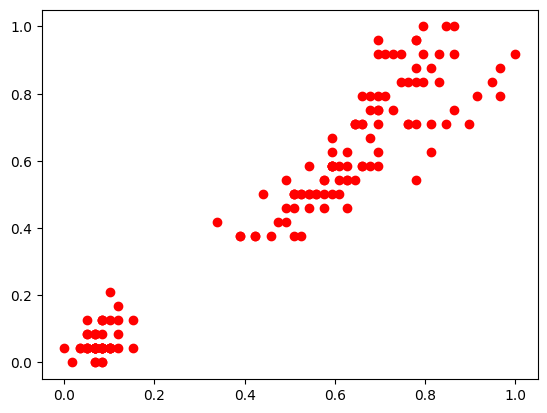

In [9]:
plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'],color='red')

In [10]:
km = KMeans(n_clusters=3)
y = km.fit_predict(iris.drop(["target","petal length (cm)","petal width (cm)"],axis=1))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
iris["Cluster"] = y
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
0,0.222222,0.625000,0.067797,0.041667,0.0,1
1,0.166667,0.416667,0.067797,0.041667,0.0,1
2,0.111111,0.500000,0.050847,0.041667,0.0,1
3,0.083333,0.458333,0.084746,0.041667,0.0,1
4,0.194444,0.666667,0.067797,0.041667,0.0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,0
146,0.555556,0.208333,0.677966,0.750000,1.0,2
147,0.611111,0.416667,0.711864,0.791667,1.0,0
148,0.527778,0.583333,0.745763,0.916667,1.0,0


In [12]:
iris.Cluster.value_counts()

2    54
1    49
0    47
Name: Cluster, dtype: int64

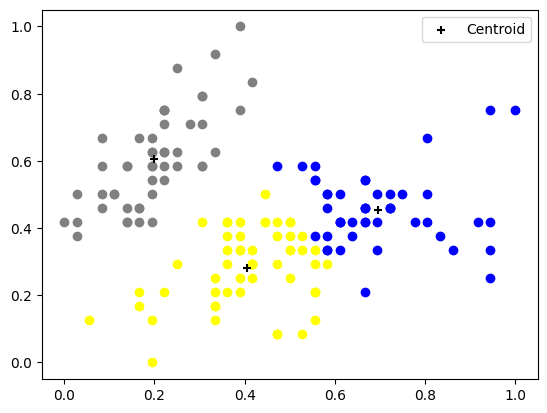

In [13]:
df1 = iris[iris.Cluster==0]
df2 = iris[iris.Cluster==1]
df3 = iris[iris.Cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='gray')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='+',label='Centroid')
plt.legend()

In [14]:
km_petal = KMeans(n_clusters=3)
y = km_petal.fit_predict(iris.drop(["target","sepal length (cm)","sepal width (cm)","Cluster"],axis=1))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
iris["Cluster_petal"] = y
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster,Cluster_petal
0,0.222222,0.625000,0.067797,0.041667,0.0,1,0
1,0.166667,0.416667,0.067797,0.041667,0.0,1,0
2,0.111111,0.500000,0.050847,0.041667,0.0,1,0
3,0.083333,0.458333,0.084746,0.041667,0.0,1,0
4,0.194444,0.666667,0.067797,0.041667,0.0,1,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,0,1
146,0.555556,0.208333,0.677966,0.750000,1.0,2,1
147,0.611111,0.416667,0.711864,0.791667,1.0,0,1
148,0.527778,0.583333,0.745763,0.916667,1.0,0,1


In [16]:
iris.Cluster_petal.value_counts()

2    52
0    50
1    48
Name: Cluster_petal, dtype: int64

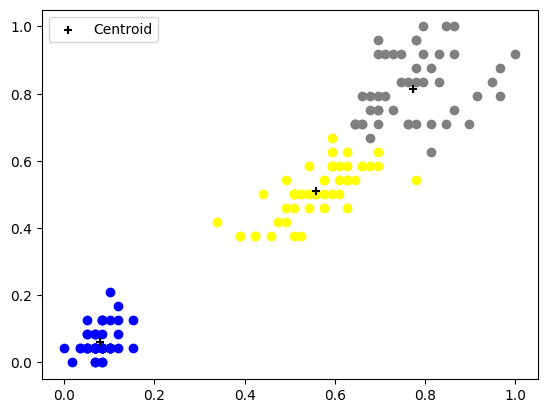

In [17]:
import matplotlib.pyplot as plt
df_p1 = iris[iris.Cluster_petal==0]
df_p2 = iris[iris.Cluster_petal==1]
df_p3 = iris[iris.Cluster_petal==2]
plt.scatter(df_p1['petal length (cm)'],df_p1['petal width (cm)'],color='blue')
plt.scatter(df_p2['petal length (cm)'],df_p2['petal width (cm)'],color='gray')
plt.scatter(df_p3['petal length (cm)'],df_p3['petal width (cm)'],color='yellow')
plt.scatter(km_petal.cluster_centers_[:,0],km_petal.cluster_centers_[:,1],color='black',marker='+',label='Centroid')
plt.legend()

Using Petal features gives us more accuracy rather than using sepal features.
Because from the plot only you can see that the sepal features are random.
But Petal features has a pattern (linear)